<a href="https://colab.research.google.com/github/crodier1/data_science/blob/main/Galaxy_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import io
import numpy as np
import os

#Loads data from url
def make_request(url):
    print("Requesting data from {}...".format(url))
    response = requests.get('https://content.codecademy.com/courses/deeplearning-with-tensorflow/'+url)
    response.raise_for_status()
    response_data = io.BytesIO(response.content)
    return response_data
    
#Loads galaxy data
def load_galaxy_data():
  
  #If cached file not found, loads data from url
  if not os.path.isfile('./cached_data.npz'):
     response_data = make_request(url='galaxydata.npz')

     with open("cached_data.npz","wb") as save_file:
      save_file.write(response_data.read())
 
  #Load data using NumPy
  data = np.load('cached_data.npz')

  print("Successfully loaded galaxy data!")
  
  return data["data"],data["labels"]

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split

input_data, labels = load_galaxy_data()

Successfully loaded galaxy data!


In [ ]:
print('Input_shape =',input_data.shape)
print('labels =',labels.shape)

Input_shape = (1400, 128, 128, 3)
labels = (1400, 4)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input_data, labels, test_size=0.2, random_state=222, stratify=labels)

In [ ]:
training_data_generator = ImageDataGenerator(rescale=1./255 
        ,zoom_range=0.2,
        rotation_range=15,
        width_shift_range=0.05,
        height_shift_range=0.05
                                             )

In [ ]:
BATCH_SIZE = 32

training_iterator = training_data_generator.flow(X_train, y_train, batch_size=BATCH_SIZE)

In [ ]:
X_train.shape

(1120, 128, 128, 3)

In [ ]:
validation_iterator = training_data_generator.flow(X_test, y_test, batch_size=BATCH_SIZE)

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=input_data.shape[1:]))

model.add(tf.keras.layers.Conv2D(8, 3, strides=2, activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides =(2,2)))

model.add(tf.keras.layers.Conv2D(8, 3, strides=2, activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides =(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(int(input_data.shape[1] * (1/3)),activation="relu"))

model.add(tf.keras.layers.Dense(128,activation="relu"))

model.add(tf.keras.layers.Dense(128,activation="relu"))

# model.add(tf.keras.layers.Dropout(.4))

model.add(tf.keras.layers.Dense(4,activation="softmax"))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 63, 63, 8)         224       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 31, 31, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 15, 15, 8)         584       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 392)               0         
                                                                 
 dense_41 (Dense)            (None, 42)              

In [ ]:
model.compile(
   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
   loss=tf.keras.losses.CategoricalCrossentropy(),
   metrics=['accuracy']
)

In [ ]:
history = model.fit(training_iterator, steps_per_epoch=len(X_train)/BATCH_SIZE, epochs=25, validation_data= validation_iterator, validation_steps= len(X_test)/BATCH_SIZE)

Epoch 1/25
35/35 [==============================] - 8s 199ms/step - loss: 1.3821 - accuracy: 0.2866 - val_loss: 1.3488 - val_accuracy: 0.4500
Epoch 2/25
35/35 [==============================] - 7s 192ms/step - loss: 1.2619 - accuracy: 0.4437 - val_loss: 1.0835 - val_accuracy: 0.5464
Epoch 3/25
35/35 [==============================] - 7s 190ms/step - loss: 1.1443 - accuracy: 0.5045 - val_loss: 1.0155 - val_accuracy: 0.6000
Epoch 4/25
35/35 [==============================] - 7s 190ms/step - loss: 1.0791 - accuracy: 0.5509 - val_loss: 0.9726 - val_accuracy: 0.6214
Epoch 5/25
35/35 [==============================] - 7s 190ms/step - loss: 1.0558 - accuracy: 0.5750 - val_loss: 1.0454 - val_accuracy: 0.5786
Epoch 6/25
35/35 [==============================] - 7s 191ms/step - loss: 1.0440 - accuracy: 0.5536 - val_loss: 0.9315 - val_accuracy: 0.6179
Epoch 7/25
35/35 [==============================] - 7s 191ms/step - loss: 1.0251 - accuracy: 0.5696 - val_loss: 0.9923 - val_accuracy: 0.5929
Epoch 

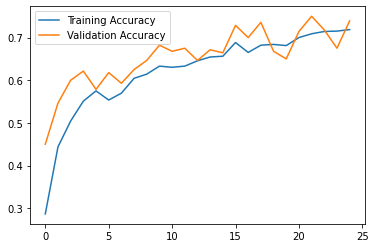

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()